# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Lee**  <br/>
Firstname: **Jian Hui**    <br/>
Student ID: **32116314**    <br/>
Email: **jlee0235@student.monash.edu**    <br/>
Your tutorial time: **Friday 2 to 4 pm**    <br/>
***


$$
    \theta
$$

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:59pm Sunday, 18 September 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for your to complete Assignment 1. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, including feedforward and convolutional neural networks. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br/>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **three** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[30 points], 30%**
* Part 2: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[30 points], 30%**
* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 1 to Week 6. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you need to capture the screenshots of your Google Colab model training and put in corresponding places in your Jupyter notebook. You also need to store your trained models to folder <span style="color:red; font-weight:bold">*./models*</span> with recognizable file names (e.g., Part3_Sec3_2_model.h5).** 

### LIBRARY IMPORTS & CONSTANTS


In [3]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import math
%matplotlib inline

MY_SEED = 1234


## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 3**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation function below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Leaky ReLU: 
$
\text{LeakyReLU}\left( x \right)=
\begin{cases}
    0.01x & \text{if}\,x<0\\
    x & \text{otherwise}
\end{cases}\
$ 
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

<span style="color:red">**(b)**</span> Softplus: $\text{Softplus}\left(x\right)=\text{ln}\left(1+e^{x}\right)$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

#### ANSWER
##### leaky ReLu:
- output range: $ - \infty \leq x \leq + \infty$
- derivative:

$$
x = \begin{cases}
   0.01 &\text{if } x < 0 \\
   1 &\text{otherwise } x \geq 0
\end{cases}
$$

##### Softplus: 
- output range: $ - \infty \leq x \leq + \infty $
- derivative:

$$
\begin{align*}
softplus'(x) & = \dfrac {1}{1 + e^x} (\dfrac {\partial}{\partial x} (1 + e^x)) \\
& = \dfrac {e^x}{1 + e^x} 
\end{align*}
$$


### Plots for LeakyReLU and Softplus


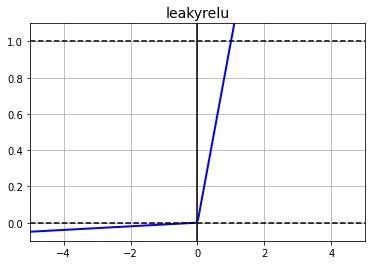

In [4]:
def leakyrelu(x):
    if x < 0:
        return 0.01*x
    else:
        return x


x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(leakyrelu(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"leakyrelu", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()


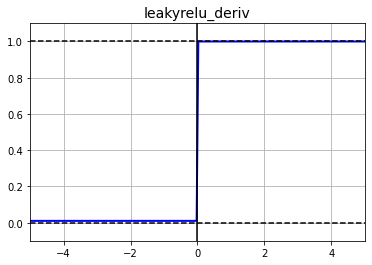

In [5]:
def leakyrelu_deriv(x):
    return 0.01 if x < 0 else 1

x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(leakyrelu_deriv(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"leakyrelu_deriv", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

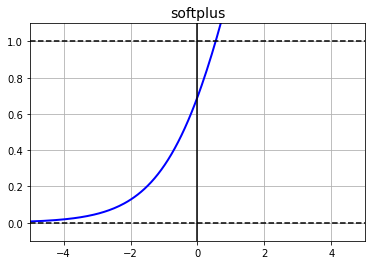

In [6]:
def softplus(x):
    # ln(1 + e^x)
    return math.log(1 + math.e ** x)

x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(softplus(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"softplus", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

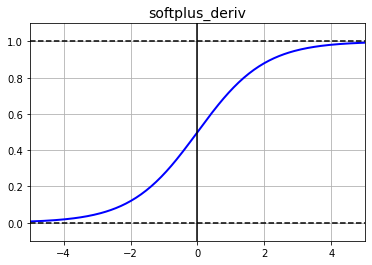

In [7]:
def softplus_deriv(x):
    # e^x / (1 + e^x)
    return (math.e ** x) / ( 1 + math.e ** x)


x = np.linspace(-5, 5, 200)


y = []
for i in range(len(x)):
    y.append(softplus_deriv(x[i]))



plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"softplus_deriv", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

<span style="color:#0b486b"> **Numpy is possibly being used in the following questions. You need to import numpy here.** </span>

####  <span style="color:red">**Question 1.2**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=2$ to the feed-forward neural network with the ReLU activation function as shown in the following figure**|
<img src="Figures/Q2_P1.png" width="500" align="center"/>
<br></br>
<img src="images/neuron_maths.png" height = "300" width="300" align="center"/>

**You need to show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your numpy code for your computation.**

In [8]:
def relu(x): return max(0,x)

def softmax(lst): 
     return np.exp(lst)/sum(np.exp(lst))

def ce_loss(lst): pass
     

x = [1,
     -1,
     1]

<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

In [9]:

"""
1. (h1)' = w1 * x + b1     [this is the first layer, but this includes all neurons at the first layer]
    - have to multiply
    - order matters
2. h1 = activation_func(h1')
"""


w1 = np.array([[1, -1, 1],
               [1, -1, -1],
               [2, -1, 2],
               [-1, -2, 1]])

b1 = np.array([1, 0, 1, 0])  # keep in mind that we should treat this as a transposed vector, so 1x4 should be 4x1
print()

h1_bar = np.matmul(w1, x)
print(h1_bar.shape)
print(h1_bar)

h1_bar = np.add(h1_bar, b1)
print(h1_bar.shape)
print(b1.shape)

f = np.vectorize(relu)
h1 = f(h1_bar)

print(h1_bar)
print(h1)



(4,)
[3 1 5 2]
(4,)
(4,)
[4 1 6 2]
[4 1 6 2]



<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [10]:
"""
h2_bar = w2 * h1 + b2
h2 = activation(h2_bar)
"""
w2 = np.array([[1, -1, -1, 2],
               [1, -1, 1, -1],
               [-1, 2, -1, 2]])
b2 = np.array([1, 1, 0])

h2_bar = np.matmul(w2, h1)
h2_bar = np.add(h2_bar, b2)

f = np.vectorize(relu)
h2 = f(h2_bar)

print(h2_bar)
print(h2)






[ 2  8 -4]
[2 8 0]


<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [11]:
"""
h3_bar = w3 * h2 + b3
h3 = activation(h3_bar)
"""
w3 = np.array([[1, -2, 1],
               [1, 2, -1],
               [-1, 1, -1]])
b3 = np.array([0, 0, 0])

h3 = np.matmul(w3, h2)
print(h3)




[-14  18   6]


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [12]:
# probabilities, p(x) = softmax(h3(x))
h3 = [float(x) for x in h3]
h3_tensor = tf.constant(name="h3", value=h3, dtype= tf.float32)

probs = tf.nn.softmax(h3_tensor)
probs  # correct, cross checked with desmos calc
print(probs)
print(probs.get_shape())


tf.Tensor([1.2664087e-14 9.9999380e-01 6.1441742e-06], shape=(3,), dtype=float32)
(3,)


<span style="color:red">**(e)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

 
In the second version of the formula, the p and q in this case are y labels AND the prediction probabilities respectively.

$𝑝_𝑚𝑥=𝑝(𝑦=𝑚|𝑥)$ is the probability to classify 𝑥 to the class 𝑚 for $1 \leq 𝑚 \leq 𝑀$.

this relies on the fact the the label is a one-hot-vector (either only 0 or 1).



when given the ground-truth label y = 2, that would mean that the corresponding grouth truth one-hot-vector for the label is y = [0,1,0].

---
the formula of CE loss (2 versions but are interchangable):

### FIRST
$$
\begin{align*}
    CE(p,q) & = - \sum_{m=1}^{M} log p_{y_i}(x_i) 
\end{align*}
$$
----
### SECOND: a generalized version of CE loss.

$$
\begin{align*}
    CE(p,q) & = - \sum_{m=1}^{M} p_m log(q_m) \\
    & = - [ 0 * log(p^1x) + 1 * log(p^2x) + 0 * log(p^3x) ]
\end{align*}
$$






In [13]:
labels = [0,1,0]
first_part = labels * np.log(probs)
print(first_part)
ce = -np.sum(labels * np.log(probs))   # sum of the negative logs
print(ce)

[-0.00000000e+00 -6.19890216e-06 -0.00000000e+00]
6.198902156029362e-06



<span style="color:red">**(f)**</span>  Assume that we are applying the label smoothing technique (i.e.,  [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) with $\alpha = 0.1$. What is the relevant loss caused by the feed-forward neural network at $(x,y)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

In [14]:
# TODO: 

# 1: define label smoothing function
from telnetlib import KERMIT


def label_smooth(y_k, alpha, K):
    """
    The label smoothing function

    Args:
        y_k: the original y label
        alpha: the label smoothing parameter
        K: the number of classes there are
    """
    y_k, K = float(y_k), float(K)
    
    # based on the formula propseod by the research paper in 1.1 preliminaries
    modified = y_k * (1 - alpha) + alpha/K
    
    return modified 

# 2: calc the CE loss using smoothed labels
smoothed_labels = [label_smooth(y_k=label, alpha=0.1, K=len(labels)) for label in labels]
print(f"smoothed_labels: {smoothed_labels}")
smooth_ce = -np.sum( smoothed_labels * np.log(probs))
print(f"smooth_ce: {smooth_ce}")







smoothed_labels: [0.03333333333333333, 0.9333333333333333, 0.03333333333333333]
smooth_ce: 1.4666729291458371


####  <span style="color:red">**Question 1.3**</span> **Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is ($3 (Input)\rightarrow4(LeakyReLU)\rightarrow 3(Output)$) as shown in the following figure. Note that the LeakyReLU has the same formula as the one in Q1.1.**


<img src="Figures/Q3_P1.png" width="500" align="center"/>

We feed a feature vector $x=\left[\begin{array}{ccc}
1 & -1 & 1.5\end{array}\right]^{T}$ with ground-truth label $y=3$ to the above network. 


**You need to show both formulas, numerical results, and your numpy code for your computation for earning full marks.**

In [15]:
#Code to generate random matrices and biases for W1, b1, W2, b2
import numpy as np
student_id = 32116314           #insert your student id here for example 1234    
np.random.seed(student_id)
W1 = np.random.rand(4,3)
print(W1)
b1 = np.random.rand(4,)  # changed from (4,1) to (4,) to make things easier in a vector form 
print(b1)
W2 = np.random.rand(3,4)
print(W2)
b2 = np.random.rand(3,)
print(b2)

x = np.array([1, -1, 1.5])

[[0.55743135 0.36949385 0.56827969]
 [0.82003266 0.85314316 0.51837443]
 [0.20115403 0.53609295 0.46779608]
 [0.83119858 0.12899386 0.91942002]]
[0.6621174  0.99488478 0.43373089 0.0377466 ]
[[0.33346435 0.04532525 0.86090495 0.9573627 ]
 [0.26253249 0.23428983 0.65721148 0.20425296]
 [0.13590971 0.5057504  0.9932175  0.96747954]]
[0.55020448 0.06553801 0.84051767]


**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
\bar{h}^{1}(x) = W1 * X + b1
$

In [16]:
h1_bar = np.matmul(W1, x)
print(h1_bar)
print(h1_bar.shape)
print(b1.shape)
h1_bar = np.add(h1_bar, b1)
print(h1_bar)

[1.04035704 0.74445115 0.3667552  2.08133475]
(4,)
(4,)
[1.70247443 1.73933593 0.80048609 2.11908135]


<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
h^1(x)= leakyReLU(\bar{h}^{1}(x))
$

In [17]:
f = np.vectorize(leakyrelu)

h1 = f(h1_bar) # tested with neg values with leakyrelu ; works fine
print(h1)

[1.70247443 1.73933593 0.80048609 2.11908135]


<span style="color:red">**(c)**</span>  What is the predicted value $\hat{y}$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
logits: \space h^2(x) = W2 * h^1(x) + b2 \\ \\
$

$
p(x) = softmax(h^2(x)) \\
$

$
\hat{y} =  argmax(p_m) \space \space ; 1 \leq m \leq M ; \text{where M is how many categorical classes there are} \\
= max(p^1(x), p^2(x), ... \space, p^m(x)) \\
$


In [18]:

h2 = np.matmul(W2, h1)
print(f'h2: {h2}')

h2 = np.add(h2, b2)
print(f'h2: {h2}')

# f = np.vectorize(softmax)
pred_probs = tf.nn.softmax(h2)
print(f'pred_probs: {pred_probs}')

# y_hat is the index of the class which corresponds to the LARGEST prob value (after softmax)
y_hat = np.amax(pred_probs)
print(f'y_hat: {y_hat}')



h2: [3.36442227 1.81338085 3.95627729]
h2: [3.91462674 1.87891886 4.79679496]
pred_probs: [0.28195059 0.03681937 0.68123005]
y_hat: 0.6812300462658298


<span style="color:red">**(d)**</span>  Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

we know the ground truth label, y = 3 ; so the one hot vector for labels = [0,0,1]

$$
\begin{align*}
    \text{CE loss, }l\text{ : }CE(p,q) & = - \sum_{m=1}^{M} p_m log(q_m) \\
    & = 0 * log(p^1x) + 0 * log(p^2x) + 1 * log(p^3x)
\end{align*}
$$

In [19]:
labels = np.array([0,0,1])
ce = -np.sum(labels * np.log(pred_probs))   # sum of the negative logs
print(ce)



0.3838552233186607


**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

#### From the 3rd layer, the output layer:
we will know the CE loss, hence we will know:
$$
\tag 1
g^2 = \frac {\partial l} {\partial h^2} = p^T - 1_y 
$$ 


From the above, and knowing that $h^2 = W^2h^1 + b^2$, we can also obtain partial derivatives $\frac {\partial l}{\partial W^2}$ and $\frac {\partial l}{\partial b^2}$ 

#### NOTE: there are tags attached below to each equation

---

$$
\tag 2
\frac{\partial l}{\partial W^{2}} 
= \frac {\partial l} {\partial h^2} * \frac {\partial h^2} {\partial W^2} 
= (g^2)^T(h^1)^T
$$

---

$$
\tag 3
\frac{\partial l}{\partial b^{2}} 
= \frac {\partial l}{\partial h^2} * \frac {\partial h^2}{\partial b^2} 
= g^2
$$


In [20]:

# equation 1
print(pred_probs.shape)
print(labels.shape)

g2 = np.subtract(pred_probs, labels)  # equation 1
g2 =  np.expand_dims(g2, axis=0)
print(g2.shape)
print(f'g^2: {g2} \n')

# equation 2
h1 =  np.expand_dims(h1, axis=1)
print(f' {g2.shape} {h1.shape}' )  
partial_l_w2 = np.matmul(np.transpose(g2), np.transpose(h1))
print(f'partial_l_w2 {partial_l_w2} \n' )  

# equation 3
partial_l_b2 = g2
print(f'partial_l_b2 {partial_l_b2} \n' )  






(3,)
(3,)
(1, 3)
g^2: [[ 0.28195059  0.03681937 -0.31876995]] 

 (1, 3) (4, 1)
partial_l_w2 [[ 0.48001367  0.49040679  0.22569752  0.59747623]
 [ 0.06268403  0.06404125  0.02947339  0.07802323]
 [-0.5426977  -0.55444803 -0.25517091 -0.67549946]] 

partial_l_b2 [[ 0.28195059  0.03681937 -0.31876995]] 



<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

---
#### pre-requisite information:


$
\frac {\partial h^1} {\partial \bar{h}^1} = diag(\sigma'(\bar{h}^1))  \text{ ; } h^1 = \sigma(\bar{h}^1)
$

---



---
#### we shall use the above information from (e) to obtain the needed derivatives below:

$$
\tag 4
\begin{align*}
g^1 
&= \frac {\partial l}{\partial h^1} \\
&= \frac {\partial l}{\partial h^2} * \frac {\partial h^2}{\partial h^1} \\
&= g^2W^2 \\
\end{align*}
$$

---
$$
\tag 5
\begin{align*}
\bar{g}^1
&= \frac {\partial l}{\partial \bar{h}^1} \\
&= \frac {\partial l}{\partial h^1} * \frac {\partial h^1}{\partial \bar{h}^1} \\
&= g^1diag(\sigma'(\bar{h}^1)) \text{ ; $\sigma'$ is the derivative of leaky ReLU}\\   
\end{align*}
$$

---
$$
\tag 6
\begin{align*}
\frac{\partial l}{\partial W^{1}}
&= \frac {\partial l}{\partial \bar{h}^1} * \frac {\partial \bar{h}^1}{\partial W^1} \\
&= (\bar{g}^1)^T(h^0)^T \\
\end{align*}
$$

---
$$
\tag 7
\frac{\partial l}{\partial b^{1}} = \bar{g} ^ 1
$$




In [21]:
# equation 4
print(f'--------equation 4---------')
# print(g2.shape)
# print(W2.shape)
partial_l_h1 = np.matmul(g2, W2)
print(partial_l_h1)

# equation 5: [1xn1] x [n1xn1] → [1×𝑛1]
print(f'--------equation 5---------')
print(h1_bar)
print(partial_l_h1.shape)
print(h1_bar.shape)

# the diag matrix of size [n1 x n1]
diag = np.array([leakyrelu_deriv(x) for x in h1_bar])
diag = np.diag(diag)
print(f'diag shape: {diag.shape}')
print(f'diag: \n {diag}')

partial_1_hbar1 = np.matmul(partial_l_h1, diag)
print(f'partial_1_hbar1: {partial_1_hbar1}')

# equation 6
print(f'--------equation 6---------')
expand_x = np.expand_dims(x,axis=1)
print(f'partial_1_hbar1: {partial_1_hbar1} MULT x : {expand_x}')
print(expand_x.shape)
partial_l_w1 = np.matmul(np.transpose(partial_1_hbar1), np.transpose(expand_x))
print(partial_l_w1)

# equation 7
print(f'--------equation 7---------')
partial_l_b1 = partial_1_hbar1




--------equation 4---------
[[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]]
--------equation 5---------
[1.70247443 1.73933593 0.80048609 2.11908135]
(1, 4)
(4,)
diag shape: (4, 4)
diag: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
partial_1_hbar1: [[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]]
--------equation 6---------
partial_1_hbar1: [[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]] MULT x : [[ 1. ]
 [-1. ]
 [ 1.5]]
(3, 1)
[[ 0.06036282 -0.06036282  0.09054423]
 [-0.13981215  0.13981215 -0.20971822]
 [-0.04967713  0.04967713 -0.07451569]
 [-0.03095397  0.03095397 -0.04643095]]
--------equation 7---------


**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[5 points]</span></div>



1. we have the loss function over the training set, 
$ 
 J(\theta_t) = L(D,h) = \frac{1}{N} \sum_{i=1}^N CE(1_{y_i}, p(x_i)) = - \frac{1}{N} \sum_{i=1}^N log p_{y_i} (x_i) \\
$
D is the data set, h are the linear functions of each layer

2. use this loss function, calculate the first order derivative of loss function w.r.t $\theta$  :  
$
\nabla_\theta J(\theta_t) = \frac {\partial J}{\partial \theta} (\theta_t)
$

3. finally update the model parameters
$
\theta_{t+1} = \theta_t - \eta \nabla_\theta J(\theta_t)
$
- $ \text{new } W^2 = W^2 - \eta \frac{\partial l}{\partial W^2}$
- $ \text{new } b^2 = b^2 - \eta \frac{\partial l}{\partial b^2}$
- $ \text{new } W^1 = W^1 - \eta \frac{\partial l}{\partial W^1}$
- $ \text{new } b^1 = b^1 - \eta \frac{\partial l}{\partial b^1}$




In [22]:
# TODO: need to ask during consultation

# for one iteration
lr = 0.01

newW2 = W2 - lr * partial_l_w2
newb2 = b2 - lr * partial_l_b2
newW1 = W1 - lr * partial_l_w1
newb1 = b1 - lr * partial_l_b1

print(f'old W2: {W2} ; new W2: {newW2}')
print(f'old b2: {b2} ; new b2: {newb2}')
print(f'old W1: {W1} ; new W1: {newW1}')
print(f'old b1: {b1} ; new b1: {newb1}')



old W2: [[0.33346435 0.04532525 0.86090495 0.9573627 ]
 [0.26253249 0.23428983 0.65721148 0.20425296]
 [0.13590971 0.5057504  0.9932175  0.96747954]] ; new W2: [[0.32866422 0.04042119 0.85864797 0.95138794]
 [0.26190565 0.23364942 0.65691675 0.20347273]
 [0.14133669 0.51129488 0.99576921 0.97423453]]
old b2: [0.55020448 0.06553801 0.84051767] ; new b2: [[0.54738497 0.06516982 0.84370537]]
old W1: [[0.55743135 0.36949385 0.56827969]
 [0.82003266 0.85314316 0.51837443]
 [0.20115403 0.53609295 0.46779608]
 [0.83119858 0.12899386 0.91942002]] ; new W1: [[0.55682773 0.37009748 0.56737424]
 [0.82143078 0.85174504 0.52047161]
 [0.2016508  0.53559617 0.46854124]
 [0.83150812 0.12868432 0.91988432]]
old b1: [0.6621174  0.99488478 0.43373089 0.0377466 ] ; new b1: [[0.66151377 0.9962829  0.43422766 0.03805614]]


## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 4**. Going through these materials before attempting this assignment is highly recommended.

In the first part of this assignment, you are going to work with the **FashionMNIST** dataset for *image recognition task*. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

####  <span style="color:red">**Question 2.1**</span>. Load the Fashion MNIST using Keras datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We first use keras incoporated in TensorFlow 2.x for loading the training and testing sets.

In [23]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

tf.random.set_seed(MY_SEED)

We first use keras datasets in TF 2.x to load Fashion MNIST dataset.

In [24]:
fashion_mnist = keras.datasets.fashion_mnist

#Insert your code here

(X_train_full_img, y_train_full), (X_test_img, y_test) =  fashion_mnist.load_data()

The shape of X_train_full_img is $(60000, 28, 28 )$ and that of X_test_img is $(10000, 28, 28)$. We next convert them to matrices of vectors and store in X_train_full and X_test.

In [25]:
num_train = X_train_full_img.shape[0]
print(X_train_full_img.shape)
print(num_train)
num_test = X_test_img.shape[0]

# insert your code here 
X_train_full = X_train_full_img.reshape(num_train,-1)  # NOTE: what does /255.0 do??
print(X_train_full)
X_test = X_test_img.reshape(num_test, -1)
#Insert your code above

print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28)
60000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(60000, 784) (60000,)
(10000, 784) (10000,)


####  <span style="color:red">**Question 2.2**</span>. Preprocess the dataset and split into training, validation, and testing datasets

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You need to write the code to address the following requirements:
- Print out the dimensions of X_train_full and X_test
- Use $10 \%$ of X_train_full for validation and the rest of X_train_full for training. This splits X_train_full and y_train_full into X_train, y_train ($90 \%$) and X_valid, y_valid ($10 \%$).
- Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).

You have now the separate training, validation, and testing sets for training your model.



In [26]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)

# TODO: insert your code below

# 1: Print out the dimensions of X_train_full and X_test
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_test.shape: {X_test.shape}')

# 2: splitting datasets
def train_valid_test_split(train_full_x, train_full_y, train_size, valid_size):
    """ valid size is depedent on train_size """
    valid_size = 0.1 * train_size    
    X_train, X_valid, y_train, y_valid = train_test_split(train_full_x, train_full_y, test_size = valid_size)
    return X_train, X_valid, y_train, y_valid

partitions = train_valid_test_split(X_train_full, y_train_full, 0.9, 0.1)

X_train, y_train = partitions[0], partitions[2]
X_valid, y_valid = partitions[1], partitions[3]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, X_valid.shape: {X_valid.shape}, y_valid.shape: {y_valid.shape}')

# 3: Finally, scale the pixels of X_train, X_valid, and X_test to $[0,1]$) (i.e., $X = X/255.0$).
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0
print(f'X_train: {X_train}\n , X_valid: {X_valid}\n, X_test: {X_test}')



X_train_full.shape: (60000, 784)
X_test.shape: (10000, 784)
X_train.shape: (54599, 784), y_train.shape: (54599,), X_valid.shape: (5401, 784), y_valid.shape: (5401,)
X_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
 , X_valid: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
, X_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
print(y_train[:50])
subset = y_train[:50]
smooth_subset = [label_smooth(label, 0.1, len(subset)) for label in subset]
smooth_subset

[9 9 8 9 4 3 9 8 1 0 8 9 7 8 9 9 7 1 2 6 0 8 5 0 6 4 5 1 1 8 6 3 0 9 1 7 2
 2 1 9 4 7 4 7 0 5 3 6 6 4]


[8.102,
 8.102,
 7.202,
 8.102,
 3.602,
 2.702,
 8.102,
 7.202,
 0.902,
 0.002,
 7.202,
 8.102,
 6.302,
 7.202,
 8.102,
 8.102,
 6.302,
 0.902,
 1.802,
 5.402,
 0.002,
 7.202,
 4.502,
 0.002,
 5.402,
 3.602,
 4.502,
 0.902,
 0.902,
 7.202,
 5.402,
 2.702,
 0.002,
 8.102,
 0.902,
 6.302,
 1.802,
 1.802,
 0.902,
 8.102,
 3.602,
 6.302,
 3.602,
 6.302,
 0.002,
 4.502,
 2.702,
 5.402,
 5.402,
 3.602]

####  <span style="color:red">**Question 2.3**</span>. Visualize some images in the training set with labels

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

You are required to write the code to show **random** $36$ images in X_train_full_img (which is an array of images) with labels as in the following figure. Note that the class names of Fashion MNIST are as follows 
- "1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"

<img src="Figures/Fashion_MNIST.png" width="450" align="center"/>

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

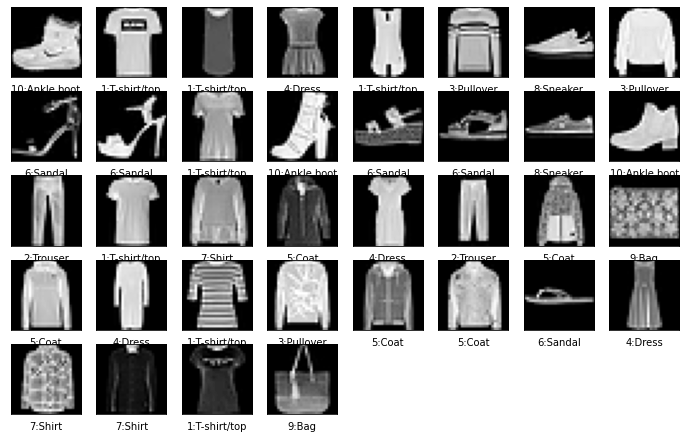

In [29]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL


def visualize_data(images, categories, images_per_row = 8):
    
    class_names = ["1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"]
    
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    
    # plotting the images onto the plot space
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i], cmap="gray")
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()
    

visualize_data(X_train_full_img[:36], y_train_full[:36])


####  <span style="color:red">**Question 2.4**</span>. Write code for the feed-forward neural net using TF 2.x

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 20(ReLU) \rightarrow 40(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $20$ epochs and evaluate the trained model on the test set.

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential


In [31]:
#Insert your code here and you can add more cells if necessary
EPOCHS = 20

class DNN(tf.keras.Model):
    def __init__(self, num_classes= 10, hiddenAct=keras.activations.relu, neuronCount = (20,40)):
        super(DNN, self).__init__()
        self.num_classes = num_classes
        self.dense1 = Dense(units=neuronCount[0],  input_shape=(n_features,), activation=hiddenAct)
        self.dense2 = Dense(units=neuronCount[1], activation=hiddenAct)
        self.dense3 = Dense(self.num_classes, activation= 'softmax')
    
    def call(self, inputs):
        # ME: forward propagation
        h = self.dense1(inputs)
        h = self.dense2(h)
        h = self.dense3(h)
        return h

# 1: pre-processing (splitting is done earlier)
train_size= int(X_train.shape[0])
n_features= int(X_train.shape[1])
n_classes= len(np.unique(y_train))
print(f'train_size: {train_size} | n_features: {n_features} | n_classes: {n_classes}')

# 2: Build the feed forward network 784 -> 20(ReLU) -> 40(ReLU) -> 10(softmax)
# dnn_model = Sequential()
# dnn_model.add(Dense(units=20,  input_shape=(n_features,), activation='relu'))
# dnn_model.add(Dense(units=40, activation='relu'))
# dnn_model.add(Dense(units=n_classes, activation='softmax'))
model = DNN(n_classes)

# 3: compile the model with optimizer of choice

model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])


# 4: training the model (20 epochs)

# Initialize a tensorboard_callback 
logDirectory = "tf_logs/"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logDirectory)

# Call the fit method, passing the tensorboard_callback 
history = model.fit(    x=X_train, y=y_train, 
                        batch_size=32, 
                        epochs=EPOCHS, 
                        validation_data=(X_valid, y_valid), 
                        callbacks=[tensorboard_callback])




train_size: 54599 | n_features: 784 | n_classes: 10
Epoch 1/20
1707/1707 [==============================] - 9s 5ms/step - loss: 0.5972 - accuracy: 0.7906 - val_loss: 0.4398 - val_accuracy: 0.8517
Epoch 2/20
1707/1707 [==============================] - 9s 6ms/step - loss: 0.4265 - accuracy: 0.8511 - val_loss: 0.3985 - val_accuracy: 0.8613
Epoch 3/20
1707/1707 [==============================] - 6s 3ms/step - loss: 0.3953 - accuracy: 0.8593 - val_loss: 0.3952 - val_accuracy: 0.8626
Epoch 4/20
1707/1707 [==============================] - 8s 5ms/step - loss: 0.3757 - accuracy: 0.8672 - val_loss: 0.4054 - val_accuracy: 0.8597
Epoch 5/20
1707/1707 [==============================] - 11s 6ms/step - loss: 0.3611 - accuracy: 0.8700 - val_loss: 0.3717 - val_accuracy: 0.8700
Epoch 6/20
1707/1707 [==============================] - 8s 5ms/step - loss: 0.3468 - accuracy: 0.8751 - val_loss: 0.3689 - val_accuracy: 0.8719
Epoch 7/20
1707/1707 [==============================] - 11s 6ms/step - loss: 0.3417

In [32]:

# 5: peformance evaluation of trained model
model.evaluate(X_test, y_test)  #return loss and accuracy


313/313 [==============================] - 1s 3ms/step - loss: 0.3809 - accuracy: 0.8689


[0.380939245223999, 0.8689000010490417]

In [33]:
# 6: save the model
# dnn_model.save('q2-4_model', save_format='tf')


####  <span style="color:red">**Question 2.5**</span>. Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

---
#### **we want to optimize:**

1. number of neurons $n1, n2$ (range is between 20 to 40 neurons)
2. activation functions used, $act \in \{ sigmoid, tanh, relu\}$ 

optional: can use ANY optimizer and learning rate 

In [34]:
#Insert your code here. You can add more cells if necessary


lst_neurons_count = [20,40] # generate integers from 20 to 40 for simplicity's sake
lst_acts = [keras.activations.sigmoid, keras.activations.tanh, keras.activations.relu]

best_acc= - np.inf
best_history = None

best_neurons_combo = [None, None]
for act in lst_acts:
    for nc1 in lst_neurons_count:  # for the 1st hidden layer
        for nc2 in lst_neurons_count:  # for the 2nd hidden layer
            # build the model
            dnn = DNN(num_classes=10, hiddenAct=act, neuronCount=(nc1, nc2)) # specifies the activation func to use for hidden layers 
            dnn.build(input_shape = (None, 784))
            dnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimzer is deaulted to RMSProp
            
            # model fitting
            print(f"Training with activation = {str(act)},  {nc1} neurons on 1st hidden layer, {nc2} on 2nd hidden layer")
            history = dnn.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)
            
            # performance evaluation
            valid_loss, valid_acc = dnn.evaluate(X_valid, y_valid)
            print('\tvalid acc = {}, valid loss = {}'.format(valid_acc, valid_loss))
            
            # check for better model
            if(valid_acc > best_acc):
                best_acc = valid_acc
                best_model = dnn
                best_act = act
                best_neurons_combo[0], best_neurons_combo[1] = nc1, nc2
                best_history = history

print(f'The best model is with activation function = {best_act}, {best_neurons_combo[0]} neurons on 1st hidden layer, {best_neurons_combo[1]} on 2nd hidden layer')
best_model.save('2-5_tuned_model', save_format='tf')
print('Saved the best model to hard disk')



Training with activation = <function sigmoid at 0x000001F0F40719D0>,  20 neurons on 1st hidden layer, 20 on 2nd hidden layer


KeyboardInterrupt: 

####  <span style="color:red">**Question 2.6**</span>. Experimenting with **the label smoothing** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Implement the label smoothing technique (i.e., [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) by yourself. Note that you cannot use the built-in label-smoothing loss function in TF2.x. Try the label smoothing technique with $\alpha =0.1, 0.15, 0.2$ and report the performances. You need to examine the label smoothing technique with the best architecture obtained in **Question 2.5**.

In [37]:
def smoothen(labels, alph):
    return [label_smooth(y_k=label, alpha=alph, K=len(labels)) for label in labels]

smoothen(y_train, 0.1)

[8.100001831535376,
 8.100001831535376,
 7.200001831535376,
 8.100001831535376,
 3.6000018315353763,
 2.7000018315353764,
 8.100001831535376,
 7.200001831535376,
 0.9000018315353762,
 1.8315353761057895e-06,
 7.200001831535376,
 8.100001831535376,
 6.300001831535376,
 7.200001831535376,
 8.100001831535376,
 8.100001831535376,
 6.300001831535376,
 0.9000018315353762,
 1.800001831535376,
 5.400001831535376,
 1.8315353761057895e-06,
 7.200001831535376,
 4.500001831535376,
 1.8315353761057895e-06,
 5.400001831535376,
 3.6000018315353763,
 4.500001831535376,
 0.9000018315353762,
 0.9000018315353762,
 7.200001831535376,
 5.400001831535376,
 2.7000018315353764,
 1.8315353761057895e-06,
 8.100001831535376,
 0.9000018315353762,
 6.300001831535376,
 1.800001831535376,
 1.800001831535376,
 0.9000018315353762,
 8.100001831535376,
 3.6000018315353763,
 6.300001831535376,
 3.6000018315353763,
 6.300001831535376,
 1.8315353761057895e-06,
 4.500001831535376,
 2.7000018315353764,
 5.400001831535376,
 5

In [ ]:
#Insert your code here. You can add more cells if necessary

# 1: prepare several smooth labelling parameters, alpha
alphas = [0.1, 0.15, 0.2]

# 2: fit and see evaluate performance of each smooth labelling parameter, alpha 
def smoothen(labels, alph):
    return [label_smooth(y_k=label, alpha=alph, K=len(labels)) for label in labels]

# NOTE: we need to use the BEST model using the BEST hyper parameters from Q2.5
best_alpha = None
best_acc = - np.inf
best_history = None

for alpha in alphas:    
    # build the model
    dnn = DNN(num_classes=10, hiddenAct=best_act, neuronCount=best_neurons_combo) # specifies the activation func to use for hidden layers 
    dnn.build(input_shape = (None, 784))
    dnn.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # optimzer is deaulted to RMSProp
    
    # model fitting
    print(f"Training best model from q2.5 with alpha={alpha}")
    # NOTE: this is where we "smoothen" the y labels
    history = best_model.fit(X_train, smoothen(y_train, alpha), batch_size=32, epochs=10, verbose=0)
    
    # performance evaluation
    valid_loss, valid_acc = dnn.evaluate(X_valid, y_valid)
    print('\tvalid acc = {}, valid loss = {}'.format(valid_acc, valid_loss))

    # check for better model using different alpha values
    if(valid_acc > best_acc):
        best_alpha = alpha
        best_acc = valid_acc
        best_alpha_model = dnn
        best_history = history

print(f'The alpha from 2.5 DNN model is alpha={alpha}')
best_model.save('2-6_tuned_model', save_format='tf')
print('Saved the best alpha model for 2.6 to hard disk')





## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 40 points]</span></div>**

**This part of the asssignment is designed to assess your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**

**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder `datasets\Animals` in your assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals. You're provided with the module <span style="color:red">models.py</span>, which you can find in the assignment folder, with some of the following classes:**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also supports generating next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement for building your CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Firstly, we need to run the following cells to load and preprocess the Animal dataset.

In [ ]:
%load_ext autoreload
%autoreload 2



Install the package `imutils` if you have not installed yet

In [ ]:
! pip install imutils

In [ ]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [ ]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [ ]:
# TODO: ask what does this do?
label_folder_dict = create_label_folder_dict("./datasets/Animals")
print(label_folder_dict)

{'butterfiles': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\butterfiles', 'cats': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\cats', 'chickens': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\chickens', 'cows': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\cows', 'dogs': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\dogs', 'elephants': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\elephants', 'fishes': 'd:\\monash stuff\\education stuff\\3rd yr\\FIT3181 Deep Learning\\assignment\\FIT3181_Assignment_1\\datasets\\Animals\\fishes', 'horses': 'd:\\mon

The below code helps to create a data manager that contains all relevant methods used to manage and process the experimental data. 

In [ ]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [ ]:
# NOTE:  there are 500 images in total for each class (but there are 501 for cat class)
    
print(data_manager.X_train.shape, data_manager.y_train.shape) 
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

print(data_manager.X_train)
print(data_manager.y_train)

(4000, 32, 32, 3) (4000,)
(500, 32, 32, 3) (500,)
(500, 32, 32, 3) (500,)
['butterfiles' 'cats' 'chickens' 'cows' 'dogs' 'elephants' 'fishes'
 'horses' 'lions' 'spiders']
[[[[ 0.45882353  0.45098039  0.42745098]
   [ 0.45882353  0.45098039  0.43529412]
   [ 0.41176471  0.40392157  0.37254902]
   ...
   [ 0.41960784  0.37254902  0.35686275]
   [ 0.43529412  0.39607843  0.36470588]
   [ 0.44313725  0.40392157  0.37254902]]

  [[ 0.46666667  0.45882353  0.44313725]
   [ 0.46666667  0.45882353  0.44313725]
   [ 0.42745098  0.41176471  0.38039216]
   ...
   [ 0.41960784  0.38039216  0.35686275]
   [ 0.42745098  0.39607843  0.36470588]
   [ 0.42745098  0.40392157  0.36470588]]

  [[ 0.46666667  0.45882353  0.44313725]
   [ 0.49019608  0.4745098   0.45882353]
   [ 0.46666667  0.44313725  0.42745098]
   ...
   [ 0.41960784  0.38823529  0.35686275]
   [ 0.42745098  0.39607843  0.36470588]
   [ 0.42745098  0.39607843  0.35686275]]

  ...

  [[ 0.42745098  0.40392157  0.38039216]
   [ 0.40392157 

We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [ ]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                     #   num_epochs = 50,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [ ]:
network1.build_cnn()
network1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [ ]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)
# TODO: change num_epochs back to 20

Epoch 1/20
63/63 [==============================] - 3s 45ms/step - loss: 2.3044 - accuracy: 0.1138 - val_loss: 2.3161 - val_accuracy: 0.0960
Epoch 2/20
63/63 [==============================] - 2s 37ms/step - loss: 2.3047 - accuracy: 0.1067 - val_loss: 2.2761 - val_accuracy: 0.1000
Epoch 3/20
63/63 [==============================] - 3s 40ms/step - loss: 2.3050 - accuracy: 0.1047 - val_loss: 2.3181 - val_accuracy: 0.0860
Epoch 4/20
63/63 [==============================] - 2s 37ms/step - loss: 2.3056 - accuracy: 0.1028 - val_loss: 2.3063 - val_accuracy: 0.0860
Epoch 5/20
63/63 [==============================] - 3s 45ms/step - loss: 2.3049 - accuracy: 0.0967 - val_loss: 2.3129 - val_accuracy: 0.0600
Epoch 6/20
63/63 [==============================] - 2s 36ms/step - loss: 2.3048 - accuracy: 0.1058 - val_loss: 2.3066 - val_accuracy: 0.1080
Epoch 7/20
63/63 [==============================] - 2s 37ms/step - loss: 2.3045 - accuracy: 0.0970 - val_loss: 2.3064 - val_accuracy: 0.0600
Epoch 8/20
63

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [2]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

NameError: name 'network1' is not defined

Below shows how you can inspect the training progress.

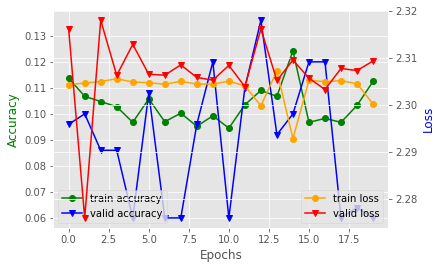

In [ ]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [ ]:
network1.predict(data_manager.X_test[0:10])

array([9, 7, 9, 3, 1, 3, 9, 9, 1, 3], dtype=int64)

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

In [ ]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

NameError: name 'network1' is not defined

<span style="color:red">**Question 3.1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? What would you do to improve it?). Write your answer below.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

*#Your answer and observation here*

### ANSWER:
- The predictions are based on numerous runs (around 7 different runs implying 7 different trained models)
- in these runs, the weight initialization of these models results in very different trained models hence the training accuracy
- Some of these models learn very well and there is an upward trend for the both training and validation accuracy
- However, some of the models did not learn very well, i.e. underfitting or overfitting
- for the models that are underfitting, there are 2 different scenarios, whereby the first scenario is that the accuracy converges to a certain value 
  - and given anymore epochs, we will certainly see that the accuracy further and further down to a small value that underfits the testing set
  - this can be due to that there arent enough parameters in the network (e.g. adding more layers, neurons count, different optimizers, etc.)
  - so we might have to explore ways such that we can add enough complexity to the network but avoid overfitting it
  - however, it could also be the case that the learning rate is too high, and we need to consider fine tuning the learning rate, as high learning rates tend to "overshoot", hence the convergence to a single loss value and directly correlates to convergence for the accuracy value.
- while in the other scenario, where there is an upwards trend
  - which indicates we just might need more epochs for the training (or the learning rate is too low for this case and requires an appropriate optimizer)
- an overall solution to the poor performance might just be better weight initializations employing the weight initialization strategies mentioned in the lectures such as Xavier and He





---
**For questions 3.2 to 3.9, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 
5. The `skip connection` is added to the output of the second `batch norm`. Additionally, your class has a boolean property (i.e., instance variable) named `use_skip`. If `use_skip=True`, the skip connectnion is enable. Otherwise, if `use_skip=False`, the skip connectnion is disable.

Below is the architecture of one block:

<img src="Figures/OneBlock.png" width="350" align="center"/>

Below is the architecture of the entire deep net with `two blocks`:

<img src="Figures/NetworkArchitecture.png" width="1200" align="center"/>

Here we assume that the first block has `feature_maps = feature_maps[0] = 32`. Note that the initial number of feature maps of the first block is declared in the instance variable `feature_maps` and is multiplied by $2$ in each follpwing block. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
tf.random.set_seed(MY_SEED)

<span style="color:red">**Question 3.2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method in the `YourModel` class from the cell below. Note that the `YourModel` class   is inherited from the `DefaultModel` class.**

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
print(data_manager.X_train.shape)
print(data_manager.y_train.shape)

(4000, 32, 32, 3)
(4000,)


In [ ]:
class Block(tf.keras.Model):
    def __init__(self, num_channels, drop_rate=0.0, use_skip=True, use_1x1conv=False, batch_norm=True, strides=1):
        """
        Each block has the pattern [conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]

        Args:
            num_channels: number of channels of output
            use_1x1conv 
            strides 
        """
        super().__init__()
        # initialize config variables
        self.num_channels = num_channels
        self.drop_rate = drop_rate
        self.use_skip = use_skip
        self.use_1x1conv = use_1x1conv
        self.batch_norm = batch_norm
        self.strides = strides
        
        """ LAYERS """
        # conv layers
        self.conv1 = tf.keras.layers.Conv2D(num_channels, padding='same', kernel_size=3, strides=strides)
        self.conv2 = tf.keras.layers.Conv2D(num_channels, kernel_size=3, padding='same')    
        # add 1x1 conv layer or not    
        if use_1x1conv:
            self.conv3_1x1 = tf.keras.layers.Conv2D(num_channels, kernel_size=1, strides=strides)
        else:
            self.conv3_1x1 = None
        # batch normalization layers
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.bn2 = tf.keras.layers.BatchNormalization()
        # pooling layer
        self.pool = tf.keras.layers.AveragePooling2D(pool_size=(2,2), padding='same')  #downscale the image size by 2
        # dropout layer
        # TODO: ask what is the rate we need?
        dropout = tf.keras.layers.Dropout(rate=drop_rate) # deactivate 25% of neurons for each feed-forward 
        
        print("initialized layers in Block class class")

    def call(self, X):
        """ just have to implement the forward pass, as required by keras.Model"""
        
        # 1: X -> conv -> BN -> Y
        Y = self.bn1(self.conv1(X)) if self.batch_norm else self.conv1(X)
        
        # Y -> activation -> Y
        Y = tf.keras.activations.relu(Y)
        
        # 2: Y -> conv -> BN -> Y
        Y = self.bn2(self.conv2(Y)) if self.batch_norm else self.conv2(Y)
        
        # see if X needs to do 1x1 conv ; 1x1 conv skip connection
        if self.conv3_1x1 is not None:
            X = self.conv3_1x1(X)

        # 3: skip connection , doing addition of matrices ; Y = Y + X
        if self.use_skip:
            Y += X
        
        # 4: Y -> act -> pool (mean) -> dropout
        # Y = self.dropout(self.pool(tf.keras.activations.relu(Y)))
        print("YourModel class forward propagates")
        return self.dropout(self.pool(tf.keras.activations.relu(Y)))
    

In [ ]:
class NetLayer(tf.keras.layers.Layer):
    def __init__(self, num_channels, first_block=False, drop_rate=0.0, use_skip=True, use_1x1conv=False, batch_norm=True, strides=1, **kwargs):
        super(NetLayer, self).__init__(**kwargs)
        self.residual_layers = []
        self.residual_layers.append(Block(num_channels, drop_rate=drop_rate, use_skip=use_skip, use_1x1conv=use_1x1conv, batch_norm=batch_norm, strides=strides))

    def call(self, X):
        for layer in self.residual_layers.layers:  # tf.keras.Model.layers
            X = layer(X)
        return X
    

In [ ]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate, verbose)


    def build_cnn(self):
        #Insert your code here
        self.model = models.Sequential()
        
        # Each block has the pattern [conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]
        # start with 32 feature maps, each successive block will multiply feature map count by 2
        for feature_map_count in self.feature_maps: 
            # print(type(self.feature_maps))
            print(f'feature_map_count: {feature_map_count}')
            
            self.model.add(Block(feature_map_count, drop_rate=self.drop_rate, use_skip=self.use_skip, use_1x1conv=True, strides=1)) # strides (1,1)
            
            self.model.add(NetLayer(feature_map_count, drop_rate=self.drop_rate, use_skip=self.use_skip, use_1x1conv=True, strides=1)) # strides (1,1)

        # flatten layer
        self.model.add(layers.Flatten())
        # Fully connected layer 
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))

        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

        # self.model.add(Block(self.feature_maps[0], drop_rate=self.drop_rate, use_skip=self.use_skip, use_1x1conv=True, strides=1)) # strides (1,1)
        
        """
        self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func, input_shape=(32,32,3)))
        self.model.add(layers.Conv2D(32, (3,3), padding='same', activation=self.activation_func))
        self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
        self.model.add(layers.Conv2D(64, (3,3), padding='same', activation=self.activation_func))
        self.model.add(layers.Conv2D(64, (3,3), padding='same', activation=self.activation_func))
        self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        """

        
        


<span style="color:red">**Question 3.3**</span> **Once writing your own model, you need to compare two cases: (i) *using the skip connection* and (ii) *not using the skip connection*. You should set the instance variable `use_skip` to either `True` or `False`. For your runs, report which case is better and if you confront overfitting in training.**
    
<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

#*Write your report and observation here*

.....




In [ ]:
our_network_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                    #  num_blocks=3,
                     num_blocks=2,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = True,
                     optimizer='adam',
                     learning_rate= 0.001)

our_network_skip.build_cnn()

our_network_skip.summary()

feature_map_count: 32
initialized layers in Block class class
feature_map_count: 64
initialized layers in Block class class


ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
print(data_manager)

In [ ]:
our_network_skip.fit(data_manager, batch_size=32, num_epochs=20)

Epoch 1/20
 35/125 [=======>......................] - ETA: 3s - loss: 2.2284 - accuracy: 0.1402

KeyboardInterrupt: 

In [ ]:
our_network_no_skip = YourModel(name='network1',
                     feature_maps=32,
                     num_classes=len(data_manager.classes),
                     num_blocks=3,
                     drop_rate= 0.0, 
                     batch_norm=True, 
                     use_skip = False,
                     optimizer='adam',
                     learning_rate= 0.001)

our_network_no_skip.build_cnn()
our_network_no_skip.summary()

In [ ]:
our_network_no_skip.fit(data_manager, batch_size=32, num_epochs=20)

<span style="color:red">**Question 3.4**</span> **Now, let us tune the $num\_blocks \in \{2,3,4\}$, $use\_skip \in \{True, False\}$, and $learning\_rate \in \{0.001, 0.0001\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `False` for not showing the training details of each epoch.**
 
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Report the best parameters and the testing accuracy here*

.....

In [ ]:
#Insert your code here. You can add more cells if necessary


<span style="color:red">**Question 3.5**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also you need to incorporate early stopping to your training process. Specifically, you early stop the training if the valid accuracy cannot increase in three consecutive epochs.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Wtire your code in the cell below. Hint that you can rewrite the code of the `fit` method to apply the data augmentation. In addition, you can copy the code of `build_cnn` method above to reuse here.

In [ ]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 use_skip = True,
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, use_skip, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here

<span style="color:red">**Question 3.6**</span> **Leverage your best model with the data augmentation and try to observe the difference in performance between using data augmentation and non-using it.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

#*Write your answer and observation here*

.....

In [ ]:
#Insert your code here. You can add more cells if necessary


<span style="color:red">**Question 3.7**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

#*Write your answer and observation here*

.....


In [ ]:
#Insert your code here. You can add more cells if necessary



<span style="color:red">**Question 3.8**</span> **Attack your best obtained model with PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary



<span style="color:red">**Question 3.9**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD, MIM, and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary



The following is an exploring question with bonus points. It is great if you try to do this question, but it is **totally optional**. In this question, we will investigate a recent SOTA technique to improve the generalization ability of deep nets named *Sharpness-Aware Minimization (SAM)* ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)).  Furthermore, SAM is simple and efficient technique, but roughly doubles the training time due to its required computation. If you have an idea to improve SAM, it would be a great paper to top-tier venues in machine learning and computer vision. Highly recommend to give it a try. 

<span style="color:red">**Question 3.10**</span> (**additionally exploring question**) Read the SAM paper ([link to the main paper](https://openreview.net/pdf?id=6Tm1mposlrM)). Try to apply this techique to the best obtained model and report the results. For the purpose of implementating SAM, we can flexibly add more cells and extensions to the `model.py` file.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

In [ ]:
#Insert your code here. You can add more cells if necessary




--- 
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**